# Full Pipeline Test
This section tests the Full Pipeline - which runs on a single participant's data.

In [1]:
import cogrecon
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
from cogrecon.core.tools import generate_random_test_points

Original Misplacement: 0.193187439004
Original Swap: 0.1
Original Edge Resizing: 0.0776543338872
Original Edge Distortion: 0.8
Axis Swap Pairs: [[2, 3]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 0.314576996499
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 0.261760115926
Raw Deanonymized Misplacement: 0.120973241824
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.787280790577
Scaling: 1.0419082837
Translation Magnitude: 0.0707669773364
Translation: [-0.05813761700883191, -0.040348266008178202]
Geometric Distance Threshold: 0.261760115926
Number of Components: 2
Accurate Placements: 1
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 4
Accurate Misassignment: 3
Inaccurate Misassignment: 1
Swap Distance Threshold: 0.231311248661
True Swap Data 

C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


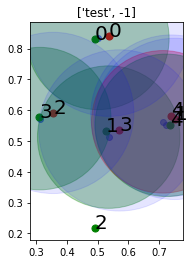

array([[0.19318743900415292, 0.1, 0.077654333887212754, 0.8, [[2, 3]], 4,
        1, 0.31457699649888093, 4, 1, 0.2617601159261167,
        0.12097324182422323, False, 1, 0.78728079057709677,
        1.0419082836975329, 0.070766977336412559,
        [-0.05813761700883191, -0.040348266008178202], 0.2617601159261167,
        2, 1, 0, 0, 0, 0, 1, 4, 3, 1, 0.23131124866091246, nan, nan, nan,
        nan, nan, nan, 0.23868300048510452, 0.33203010814357647,
        [[1, 2, 3, 4], [0]]]], dtype=object)

In [6]:
# Test with random first
a, b = generate_random_test_points()
data = ParticipantData([TrialData(a, b)])
config = AnalysisConfiguration(debug_labels=['test', -1])
full_pipeline(data, config, visualize=True)

In [7]:
# Now test with data
actual_coordinates_filepath = r"Z:\Kevin\iPosition\Hillary\MRE\actual_coordinates.txt"
filepath_template = r"Z:\Kevin\iPosition\Hillary\MRE\{0}\{0}position_data_coordinates.txt"
participant_ids = ['101', '104', '105', '112', '104', '101', '114', '118', '119', '120', '101', '104', '113', '120']
labels = ['Cycle Agree - 101', 'Cycle Agree - 104', 'Cycle Agree - 105', 'Cycle Agree - 112',
          'Debatable - 104',
          'New Single Swap - 101', 'New Single Swap - 114',
          'New Single Swap - 118', 'New Single Swap - 119', 'New Single Swap - 120',
          'Old False Positive - 101', 'Old False Positive - 104',
          'Old False Positive - 113', 'Old False Positive - 120']
trial_nums = [10, 12, 2, 6, 2, 0, 12, 10, 10, 14, 11, 10, 2, 12]

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (15, 5, 2))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    full_pipeline(data, config, visualize=True)

IOError: [Errno 2] No such file or directory: 'Z:\\Kevin\\iPosition\\Hillary\\MRE\\actual_coordinates.txt'

# Batch Pipeline Test
This section tests the Batch Pipeline, which runs on a folder full of data files, automatically finding the appropriate files.

In [1]:
import cogrecon
from cogrecon.core.batch_pipeline import batch_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
import Tkinter as tk
from tkFileDialog import askdirectory
import os, datetime

In [4]:
import easygui
selected_directory = easygui.fileopenbox()

print(selected_directory)
print(type(selected_directory))
if os.path.exists(selected_directory):
    batch_pipeline(str(selected_directory), datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"))
elif selected_directory is not '':
    logging.error('Directory not found.')

None
<type 'NoneType'>


TypeError: coercing to Unicode: need string or buffer, NoneType found

In [5]:
batch_pipeline("Z:\\Kevin\\iPosition\\Hillary\\MRE",
               datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"),
               data_shape=(15, 5, 2))

INFO:root:Finding files in folder Z:\Kevin\iPosition\Hillary\MRE.
ERROR:root:The input path was not found.


NameError: global name 'exit' is not defined